In [1]:
#importing the libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential #creating the architecture for the CNN
from keras.layers import Dense, Conv2D, Flatten #creating layers for the model
import numpy as np
import os #to access the data stored in the computer
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np # linear algebra
#import random
# data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import random
import shutil
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import shutil
from glob import glob
# Helper libraries
import matplotlib.pyplot as plt
#import math
%matplotlib inline
#print(tf.__version__)

In [2]:
data_root='C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets'
path_unauthenticate_image = os.path.join('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/unauthenticate')
path_authenticate_image = os.path.join('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/authenticate')

In [3]:
unauthenticate_images_ls = glob(os.path.join(path_unauthenticate_image,"*.jpeg"))

authenticate_images_ls = glob(os.path.join(path_authenticate_image,"*.jpeg"))
authenticate_images_ls.extend(glob(os.path.join(path_authenticate_image,"*.jpeg")))

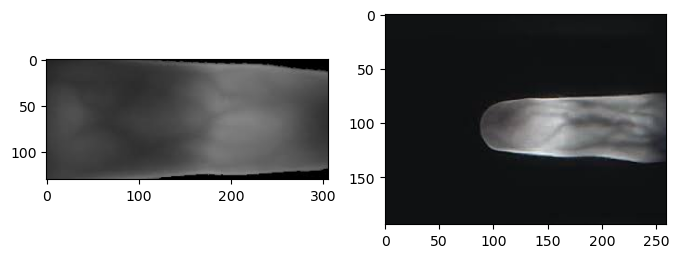

In [4]:
image_unauthenticate = cv2.imread(os.path.join(unauthenticate_images_ls[1]))
image_authenticate = cv2.imread(os.path.join(authenticate_images_ls[5]))
operatedImage = cv2.cvtColor(image_authenticate, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

f = plt.figure(figsize=(8, 8))
f.add_subplot(1, 2, 1)
plt.imshow(image_authenticate)
f.add_subplot(1,2, 2)
plt.imshow(image_unauthenticate)

In [4]:
total_train_unauthenticate = len(os.listdir('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/train/unauthenticate'))
total_train_authenticate = len(os.listdir('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/train/authenticate'))
total_test_unauthenticate = len(os.listdir('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/test/unauthenticate'))
total_test_authenticate = len(os.listdir('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/test/authenticate'))

print("Train sets images unauthenticate: {}".format(total_train_unauthenticate))
print("Train sets images healthy: {}".format(total_train_authenticate))
print("Test sets images unauthenticate: {}".format(total_test_unauthenticate))
print("Test sets images authenticate: {}".format(total_test_authenticate))

Train sets images unauthenticate: 29
Train sets images healthy: 24
Test sets images unauthenticate: 29
Test sets images authenticate: 24


In [5]:
batch_size =15
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [6]:

train_dir = os.path.join('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/train')
test_dir = os.path.join('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/test')


total_train = total_train_authenticate + total_train_unauthenticate
total_test = total_test_authenticate + total_test_unauthenticate

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 53 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)

])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        

In [10]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size
)

Epoch 1/50


3/3 [==============================] - 3s 431ms/step - loss: 1.2217 - accuracy: 0.3684 - val_loss: 0.7057 - val_accuracy: 0.4667
Epoch 2/50
3/3 [==============================] - 1s 251ms/step - loss: 0.7089 - accuracy: 0.4222 - val_loss: 0.6701 - val_accuracy: 0.4444
Epoch 3/50
3/3 [==============================] - 1s 225ms/step - loss: 0.6806 - accuracy: 0.5263 - val_loss: 0.6415 - val_accuracy: 0.4000
Epoch 4/50
3/3 [==============================] - 1s 249ms/step - loss: 0.6810 - accuracy: 0.3947 - val_loss: 0.6367 - val_accuracy: 0.4889
Epoch 5/50
3/3 [==============================] - 1s 218ms/step - loss: 0.6465 - accuracy: 0.4737 - val_loss: 0.6061 - val_accuracy: 0.6000
Epoch 6/50
3/3 [==============================] - 1s 254ms/step - loss: 0.6573 - accuracy: 0.5789 - val_loss: 0.5306 - val_accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 1s 260ms/step - loss: 0.5939 - accuracy: 0.5526 - val_loss: 0.5587 - val_accuracy: 0.6444
Epoch 8/50
3/3 [==

1/1 [==============================] - 0s 175ms/step
[[3141.8186]]
unauthenticate


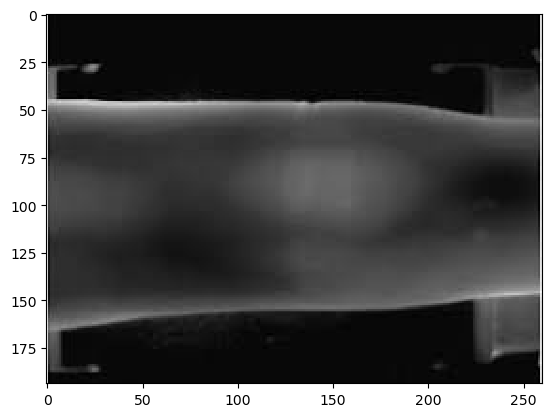

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image

img=mpimg.imread('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/test/unauthenticate/download 20.jpeg')
imgplot = plt.imshow(img, interpolation='none')

test_image = image.load_img('C:/Users/Satwi/Downloads/finger liveness python/finger liveness python/datasets/test/unauthenticate/download 20.jpeg', target_size = (150, 150))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)

if result>=1:
    print( 'unauthenticate')
else:
    print( 'authenticate')